<a href="https://colab.research.google.com/github/WSzymczak23/projekty-SDA/blob/main/Copy_of_projekt_praktyczny_regresja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('weatherHistory.csv')

df = df[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Pressure (millibars)']]

df = df.head(500)

df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars)
0,9.472222,7.388889,0.89,14.1197,1015.13
1,9.355556,7.227778,0.86,14.2646,1015.63
2,9.377778,9.377778,0.89,3.9284,1015.94
3,8.288889,5.944444,0.83,14.1036,1016.41
4,8.755556,6.977778,0.83,11.0446,1016.51
...,...,...,...,...,...
495,21.177778,21.177778,0.43,19.8191,1009.55
496,21.227778,21.227778,0.41,16.4703,1009.04
497,20.100000,20.100000,0.45,13.7977,1008.55
498,19.027778,19.027778,0.51,9.7888,1008.17


In [ ]:
new_column = df['Temperature (C)'] - df['Apparent Temperature (C)']

df['Temp Diff'] = new_column

df

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Pressure (millibars),Temp Diff
0,9.472222,7.388889,0.89,14.1197,1015.13,2.083333
1,9.355556,7.227778,0.86,14.2646,1015.63,2.127778
2,9.377778,9.377778,0.89,3.9284,1015.94,0.000000
3,8.288889,5.944444,0.83,14.1036,1016.41,2.344444
4,8.755556,6.977778,0.83,11.0446,1016.51,1.777778
...,...,...,...,...,...,...
495,21.177778,21.177778,0.43,19.8191,1009.55,0.000000
496,21.227778,21.227778,0.41,16.4703,1009.04,0.000000
497,20.100000,20.100000,0.45,13.7977,1008.55,0.000000
498,19.027778,19.027778,0.51,9.7888,1008.17,0.000000


**Update:**
- Wszystkie wykresy są narysowane i przedstawione na training secie. Wykres dla drzewa decyzyjnego wygląda teraz prawidłowo.
- Metryki R2 i RMSE są obliczane na podstawie test setu we wszystkich przypadkach regresji. R2 dla regresji wielomianowej nie wychodzi już ujemne.

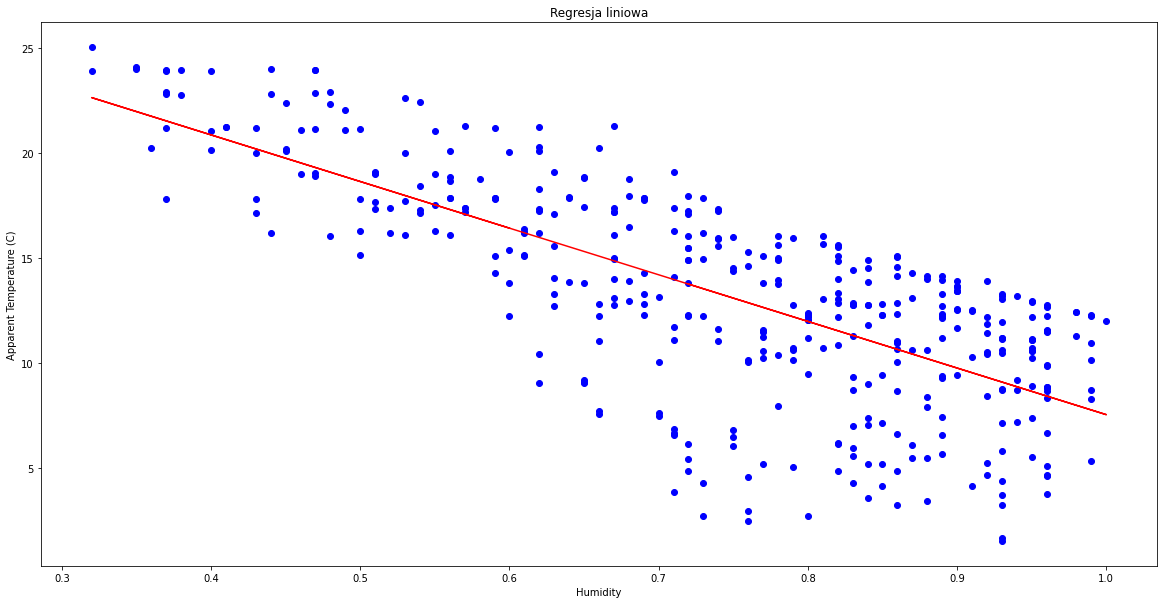


R2: 0.5795274248395492
RMSE: 3.371901954297956


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df[['Humidity']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize = (20, 10))
plt.scatter(X_train, y_train, color='b')
plt.plot(X_train, model.predict(X_train), color='r')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title('Regresja liniowa')
plt.show()

from sklearn.metrics import r2_score, mean_squared_error

print()
print(f"R2: {r2_score(y_test, y_pred)}")
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')

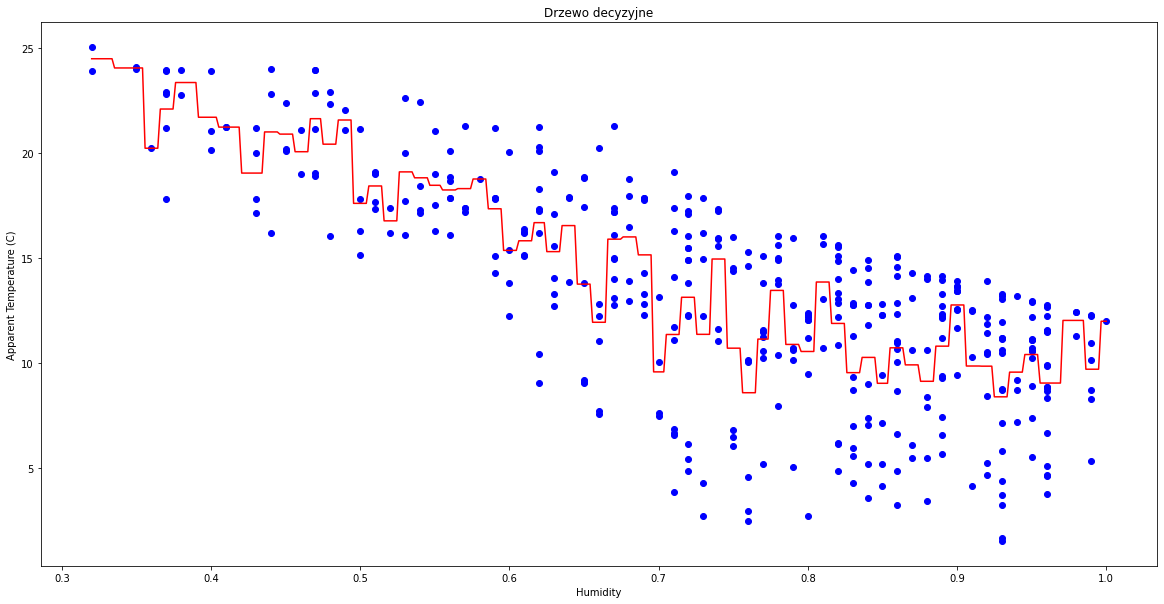


R2: 0.5924762825901295
RMSE: 3.3195754593333247


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

X = df[['Humidity']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

x = np.linspace(min(X_train.values), max(X_train.values), 400)

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

fig = plt.figure(figsize=(20, 10))
plt.scatter(X_train, y_train, color='b')
plt.plot(x, model.predict(x), color='r')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title('Drzewo decyzyjne')
plt.show()

from sklearn.metrics import r2_score, mean_squared_error

print()
print(f"R2: {r2_score(y_test, y_pred)}")
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')


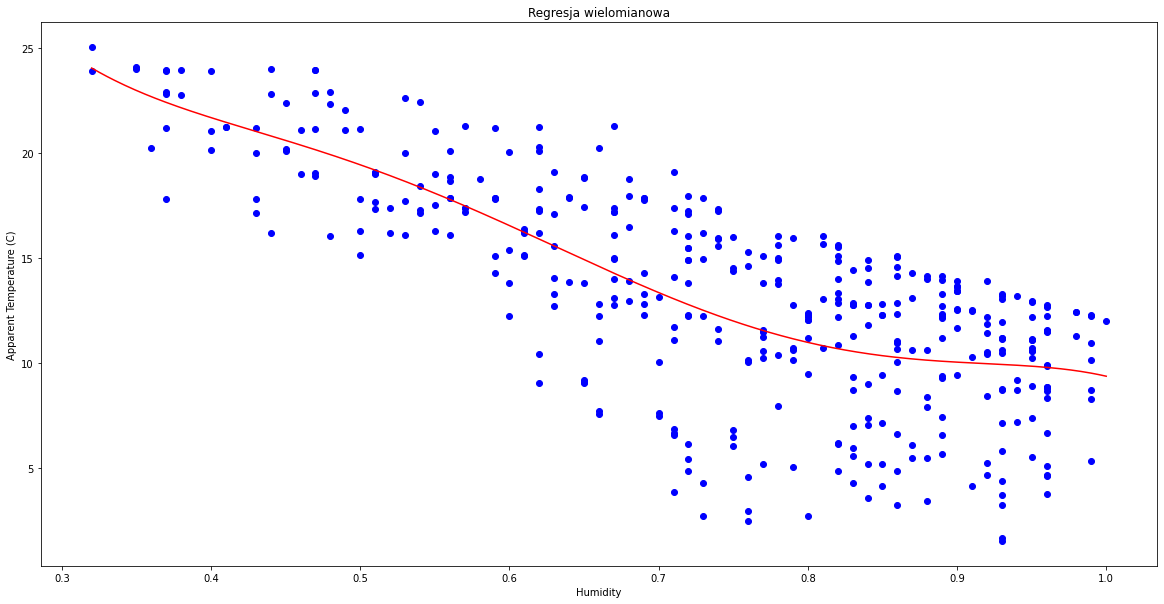


R2: 0.5560712203659445
RMSE: 3.4646769851418955


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

X = df[['Humidity']]
y = df['Apparent Temperature (C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

poly = PolynomialFeatures(degree=5)
X_poly = poly.fit_transform(X_train)

x = np.linspace(min(X_train.values), max(X_train.values), 400)
x_poly = poly.fit_transform(x)

model = LinearRegression()
model.fit(X_poly, y_train)

y_pred = model.predict(poly.transform(X_test))

plt.figure(figsize = (20, 10))
plt.scatter(X_train, y_train, color='b')
plt.plot(x, model.predict(x_poly), color='r')
plt.xlabel('Humidity')
plt.ylabel('Apparent Temperature (C)')
plt.title("Regresja wielomianowa")
plt.show()

from sklearn.metrics import r2_score, mean_squared_error

print()
print(f"R2: {r2_score(y_test, y_pred)}")
print(f'RMSE: {mean_squared_error(y_test, y_pred, squared=False)}')
